In [23]:
import pandas as pd
import random

# READING DATAFRAME


In [27]:
df = pd.read_csv("ds_salaries.csv")
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [ ]:
from utils import generate_working_hour_means, generate_working_hours

distribution_mean = generate_working_hour_means(df)
df = generate_working_hours(df, distribution_mean)

In [28]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named df with 'experience_level' column

# Define a function to generate ages based on experience level


def generate_age(experience_level):
    if experience_level == "SE":
        # Normal distribution, most between 35 and 45
        return int(np.random.normal(loc=40, scale=5))
    elif experience_level == "EX":
        # Most between 47.5 and 57.5
        return int(np.random.normal(loc=52.5, scale=5))
    elif experience_level == "MI":
        return int(np.random.normal(loc=30, scale=5))  # Most between 25 and 35
    elif experience_level == "EN":
        # Most between 18 and 25
        return int(np.random.normal(loc=21.5, scale=2.5))
    else:
        return None


# Apply the function to create the 'age' column
df['age'] = df['experience_level'].apply(generate_age)

In [30]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named df with 'salary_in_usd' column

# Define a function to generate gender based on salary


def generate_gender(salary):
    # Adjust mean and standard deviation as needed
    male_mean, male_std = 80000, 15000
    female_mean, female_std = 60000, 15000

    # Generate salary based on gender
    if np.random.rand() < 0.5:  # 50% chance for each gender
        return "Male" if salary > np.random.normal(male_mean, male_std) else "Female"
    else:
        return "Female" if salary < np.random.normal(female_mean, female_std) else "Male"


# Apply the function to create the 'gender' column
df['gender'] = df['salary_in_usd'].apply(generate_gender)

# DATA CLEANING


In [31]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [32]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
age                   0
gender                0
dtype: int64

In [33]:
print('there are', df.isnull().sum(), 'missing values')
print('there are', df.duplicated().sum(), 'duplicated values')

there are work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
age                   0
gender                0
dtype: int64 missing values
there are 144 duplicated values


In [11]:
df_final = df.drop_duplicates()

In [12]:
print('there are', df_final.isnull().sum(), 'missing values')
print('there are', df_final.duplicated().sum(), 'duplicated values')

there are work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
gender                0
age                   0
dtype: int64 missing values
there are 0 duplicated values


# Plots


In [34]:
df_final.describe()

,work_year,salary,salary_in_usd,remote_ratio,age
count,3515.000000,3.515000e+03,3515.000000,3515.000000,3515.000000
mean,2022.364438,1.938273e+05,137066.176956,47.211949,36.525178
std,0.701278,6.940113e+05,63940.360649,48.564121,7.386487
min,2020.000000,6.000000e+03,5132.000000,0.000000,18.000000
25%,2022.000000,9.900000e+04,93075.000000,0.000000,33.000000
50%,2022.000000,1.360000e+05,134000.000000,0.000000,38.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000,42.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000,60.000000


In [37]:
df_final.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'gender', 'age'],
      dtype='object')

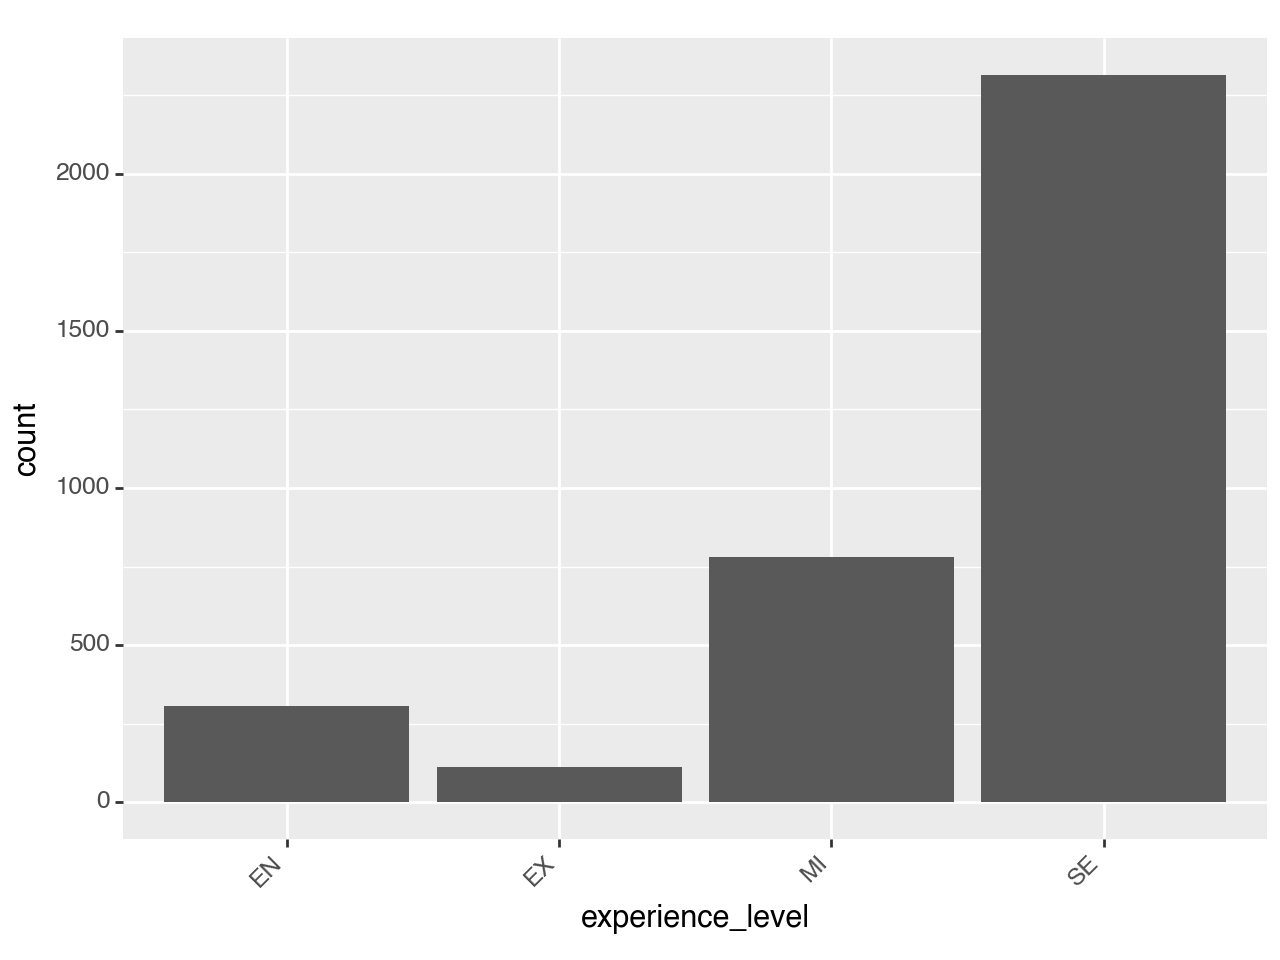

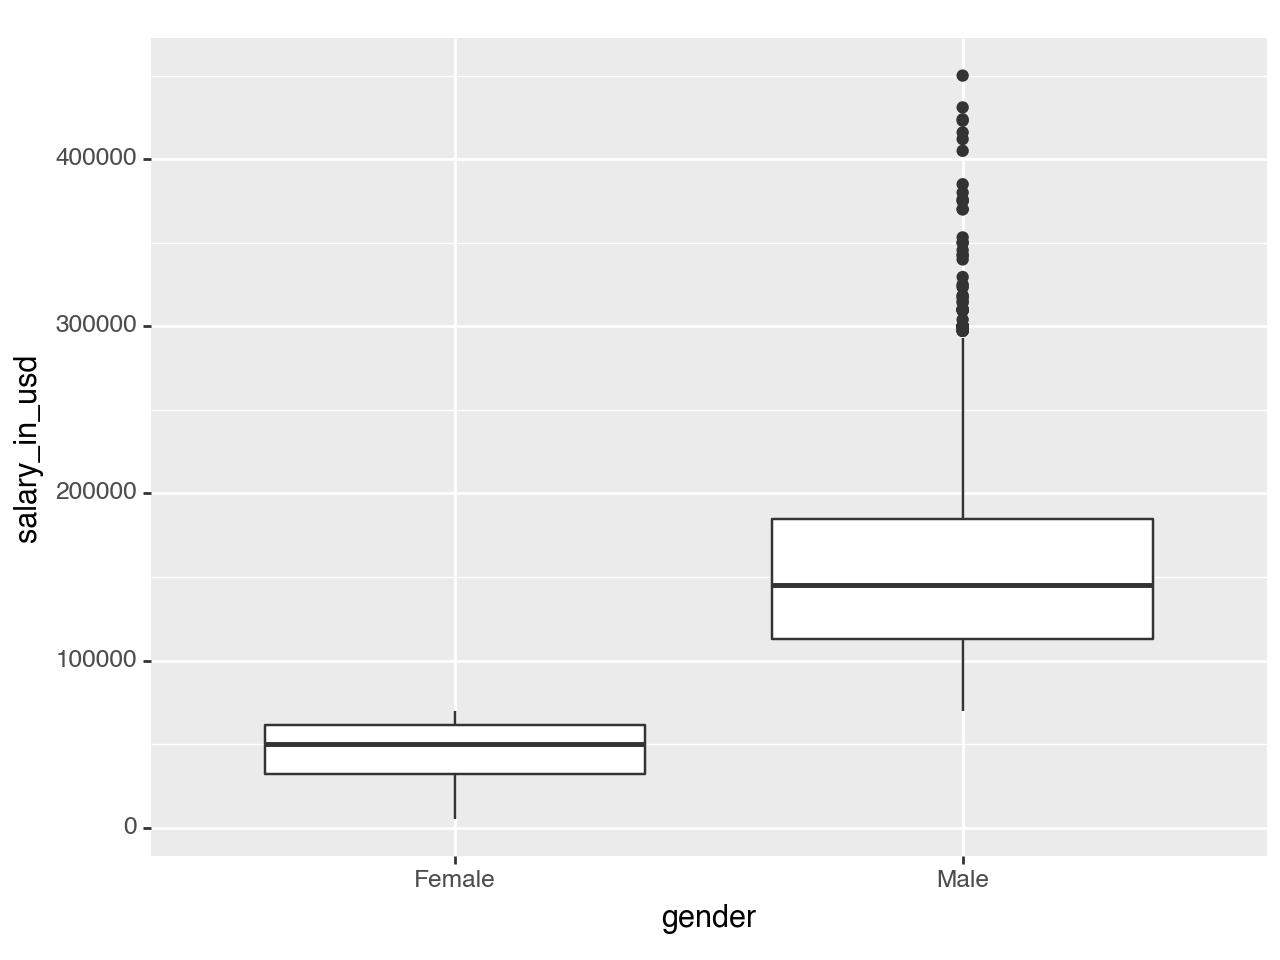

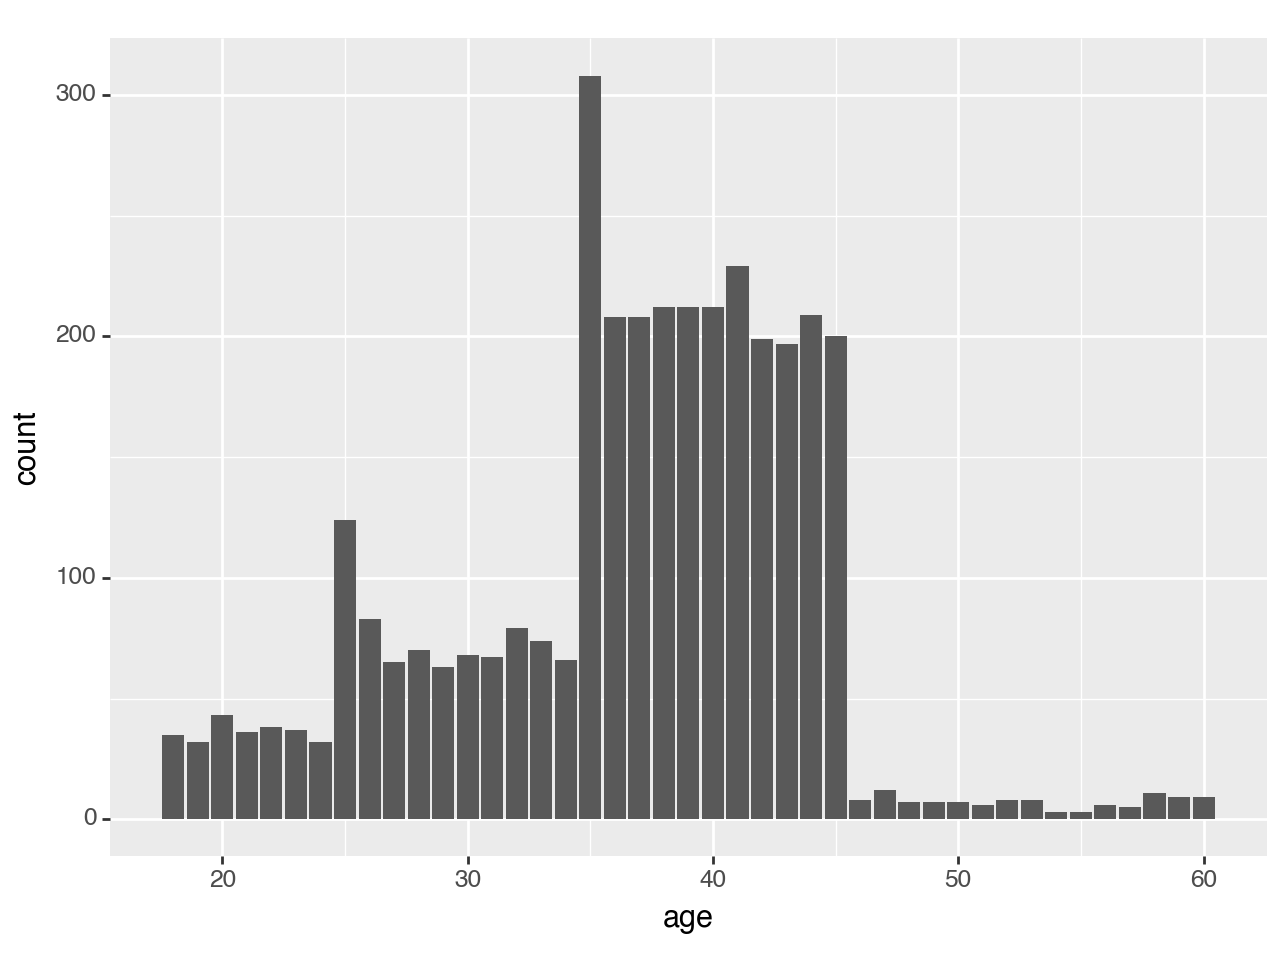

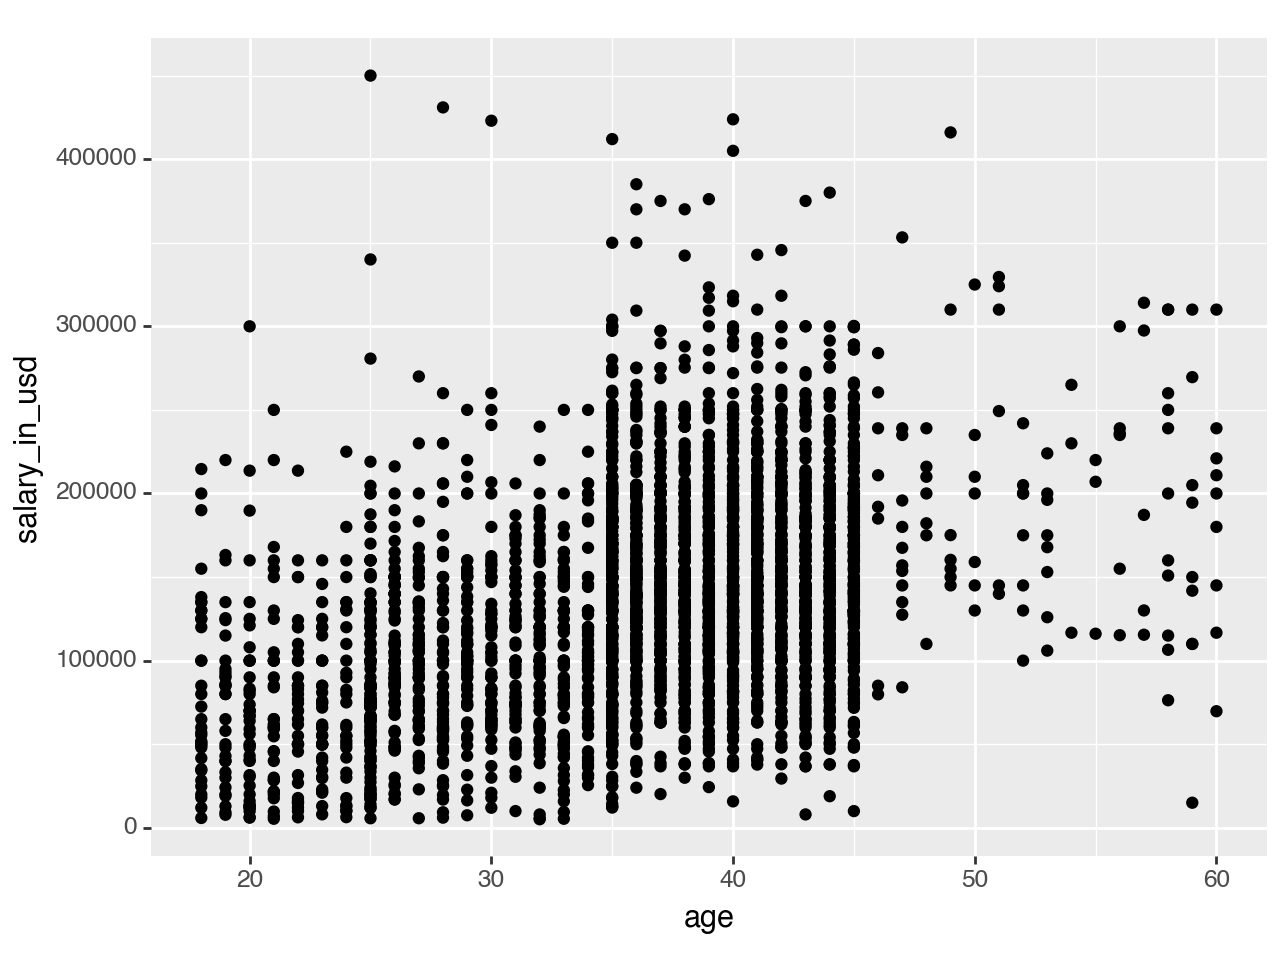

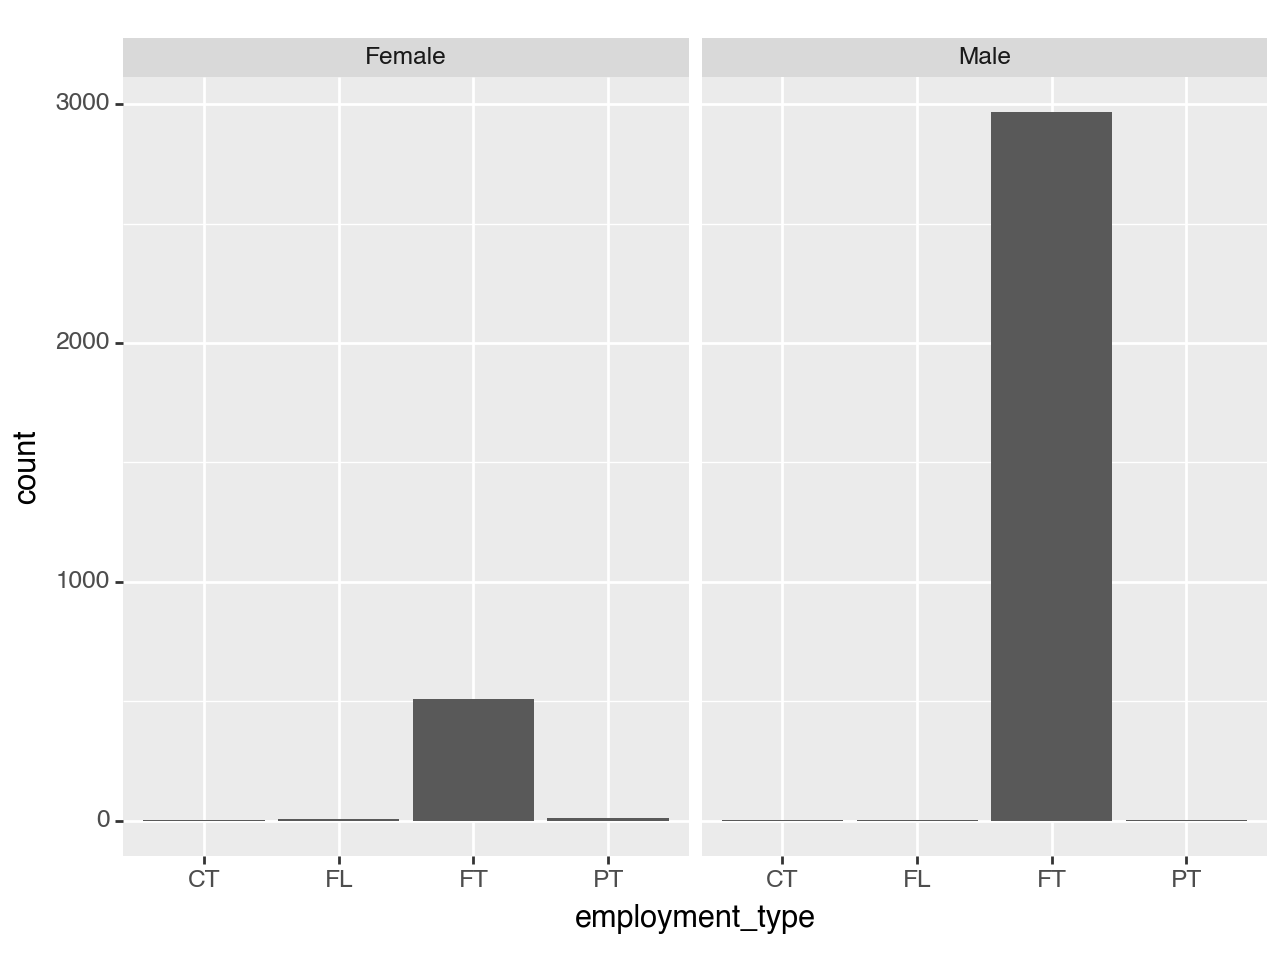

In [40]:
from plotnine import ggplot, aes, geom_bar, geom_boxplot, geom_point, theme_minimal, theme, facet_wrap, element_text

# Example: Bar chart for experience_level
experience_level_plot = (
    ggplot(df_final, aes(x='experience_level'))
    + geom_bar()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

# Example: Boxplot for salary by gender
salary_gender_plot = (
    ggplot(df_final, aes(x='gender', y='salary_in_usd'))
    + geom_boxplot()
)

# Example: Histogram for age
age_histogram = (
    ggplot(df_final, aes(x='age'))
    + geom_bar()
)

# Example: Scatter plot for age vs salary
age_salary_scatter = (
    ggplot(df_final, aes(x='age', y='salary_in_usd'))
    + geom_point()
)

# Example: Bar chart for employment_type with facets for gender
employment_gender_facet = (
    ggplot(df_final, aes(x='employment_type'))
    + geom_bar()
    + facet_wrap('~gender')
)

# Display the plots
print(experience_level_plot)
print(salary_gender_plot)
print(age_histogram)
print(age_salary_scatter)
print(employment_gender_facet)